# Pós-graduação Lato Sensu em Ciência de Dados e Big Data - PUC MG

## TCC turma 2020 - Gabriel Fonseca da Silva


### Objetivo: desenvolver um algoritmo de machine learning para prever a aprovação de um candidato na prova  do ENCCEJA 2019 para obtenção do certificado do ensino fundamental

## Dados utilizados:

### a) Microdados do ENCCEJA Nacional Regular 2019 dos inscritos que fizeram as provas do ensino fundamental

##### https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/encceja

### b) Dados de homicídios por UF do ano de 2019 extraídos do DATASUS (grupo CID10 X85-Y09 e Y35-Y36)
#### http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sim/cnv/ext10uf.def

### c) População por UF estimada extraída do DATASUS (estimativas utilizadas pelo TCU)
#### http://tabnet.datasus.gov.br/cgi/tabcgi.exe?ibge/cnv/poptuf.def

### d) Índice de Desenvolvimeno Humano por Estado extraído do Atlas Brasil do IPEA
#### http://www.atlasbrasil.org.br/



## Aplicação: Árvore de Decisão

### 1) Importando bibliotecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text

from joblib import dump, load
import graphviz
import os

import warnings
warnings.filterwarnings("ignore")

### 2) Carregando os dados transformados

In [2]:
# Importando os dados após a análise exploratória de dados

dados = pd.read_csv("05-dados_transformados\dados_arvore.csv", sep = ',', encoding = "ISO-8859-1")

print("\nDimensões: {0}".format(dados.shape))
print("\nCampos: {0}".format(dados.keys()))



Dimensões: (144757, 52)

Campos: Index(['genero_Feminino', 'moradia_pessoas_A-Até 3 pessoas',
       'moradia_tipo_A-Própria', 'moradia_local_B-Zona urbana',
       'escolaridade_pai_A-Não estudou/não sabe',
       'escolaridade_pai_B-Antigo primário',
       'escolaridade_pai_C-Antigo ginásio',
       'escolaridade_pai_D-Médio/Superior/especialização',
       'escolaridade_mae_A-Não estudou/não sabe',
       'escolaridade_mae_B-Antigo primário',
       'escolaridade_mae_C-Antigo ginásio',
       'escolaridade_mae_D-Médio/Superior/especialização',
       'renda_propria_A-Nenhuma renda', 'renda_propria_B-Até 1 SM',
       'renda_propria_C-Mais de 1 SM', 'trabalha_A-Sim',
       'reprovou_A-Nenhuma vez', 'reprovou_B-Uma vez', 'reprovou_C-Duas vezes',
       'reprovou_D-Três vezes ou mais', 'motivo_estudo_A-Conseguir um emprego',
       'motivo_estudo_B-Conseguir um emprego melhor',
       'motivo_estudo_C-Adquirir conhecimento', 'motivo_estudo_D-Outro motivo',
       'serie_estudo_A-4ª 

#### 2.1) Separando o target

In [3]:
# Separando os atributos e o target

## Número de atributos 

k=dados.shape[1]-1


## Selecionando os atributos

X0 = dados.iloc[:,0:k]


# Selecionando o target

y0 = dados.iloc[:,k]


# Visualizando o nome dos atributos

print("\nDimensões: {0}".format(X0.shape))
print('Nomes dos atributos de X: ')
print("\nCampos: {0}".format(X0.keys()))


Dimensões: (144757, 51)
Nomes dos atributos de X: 

Campos: Index(['genero_Feminino', 'moradia_pessoas_A-Até 3 pessoas',
       'moradia_tipo_A-Própria', 'moradia_local_B-Zona urbana',
       'escolaridade_pai_A-Não estudou/não sabe',
       'escolaridade_pai_B-Antigo primário',
       'escolaridade_pai_C-Antigo ginásio',
       'escolaridade_pai_D-Médio/Superior/especialização',
       'escolaridade_mae_A-Não estudou/não sabe',
       'escolaridade_mae_B-Antigo primário',
       'escolaridade_mae_C-Antigo ginásio',
       'escolaridade_mae_D-Médio/Superior/especialização',
       'renda_propria_A-Nenhuma renda', 'renda_propria_B-Até 1 SM',
       'renda_propria_C-Mais de 1 SM', 'trabalha_A-Sim',
       'reprovou_A-Nenhuma vez', 'reprovou_B-Uma vez', 'reprovou_C-Duas vezes',
       'reprovou_D-Três vezes ou mais', 'motivo_estudo_A-Conseguir um emprego',
       'motivo_estudo_B-Conseguir um emprego melhor',
       'motivo_estudo_C-Adquirir conhecimento', 'motivo_estudo_D-Outro motivo',

#### 2.2) Separando dados em treino e teste

In [4]:
# Criando os conjuntos de dados de treino e de teste

seed = 7

X_treino, X_teste, y_treino, y_teste = train_test_split(X0, y0, test_size = 0.30, random_state = seed)

print("\nDimensões: {0}".format(X_treino.shape))
print("\nDimensões: {0}".format(y_treino.shape))
print("\nDimensões: {0}".format(X_teste.shape))
print("\nDimensões: {0}".format(y_teste.shape))


Dimensões: (101329, 51)

Dimensões: (101329,)

Dimensões: (43428, 51)

Dimensões: (43428,)


### 3) Indução do modelo

#### 3.1) Árvore de decisão utilizando entropia

In [5]:
# indução do modelo

treeAprov = DecisionTreeClassifier(random_state=seed, criterion='entropy', class_weight='balanced',max_depth=7)
treeAprov = treeAprov.fit(X_treino, y_treino)

y_pred = treeAprov.predict(X_teste)

print(classification_report(y_teste, y_pred))

cnf_matrix = confusion_matrix(y_teste, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Aprovado=Não", "Aprovado=Sim"], 
                         columns=["Aprovado(prev)=Não", "Aprovado(prev)=Sim"])
print(cnf_table)

print("\n Acurácia: \n", accuracy_score(y_teste, y_pred))


# Curva ROC

print('\n Área abaixo da curva - AUC: %0.4f' % roc_auc_score(y_teste, y_pred))

def plot_roc_curve(y_teste, y_pred, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_teste, y_pred)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_teste, y_pred)
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()
    
plot_roc_curve(y_teste, y_pred)    

              precision    recall  f1-score   support

           0       0.67      0.57      0.62     24404
           1       0.54      0.63      0.58     19024

    accuracy                           0.60     43428
   macro avg       0.60      0.60      0.60     43428
weighted avg       0.61      0.60      0.60     43428

              Aprovado(prev)=Não  Aprovado(prev)=Sim
Aprovado=Não               14014               10390
Aprovado=Sim                6975               12049

 Acurácia: 
 0.6001427650363821

 Área abaixo da curva - AUC: 0.6038


#### 3.2) Árvore de decisão utilizando Gini

In [6]:
# indução do modelo

treeAprov2 = DecisionTreeClassifier(random_state=seed, criterion='gini', class_weight='balanced', max_depth=7)
treeAprov2 = treeAprov2.fit(X_treino, y_treino)

y_pred2 = treeAprov2.predict(X_teste)

print(classification_report(y_teste, y_pred2))

cnf_matrix2 = confusion_matrix(y_teste, y_pred2)
cnf_table2 = pd.DataFrame(data=cnf_matrix2, index=["Aprovado=Não", "Aprovado=Sim"], 
                         columns=["Aprovado(prev)=Não", "Aprovado(prev)=Sim"])
print(cnf_table2)

print("\n Acurácia: \n", accuracy_score(y_teste, y_pred2))

# Curva ROC

print('\n Área abaixo da curva - AUC: %0.4f' % roc_auc_score(y_teste, y_pred2))

def plot_roc_curve(y_teste, y_pred2, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_teste, y_pred2)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_teste, y_pred2)
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()
    
plot_roc_curve(y_teste, y_pred2)    


              precision    recall  f1-score   support

           0       0.67      0.58      0.62     24404
           1       0.54      0.63      0.58     19024

    accuracy                           0.60     43428
   macro avg       0.60      0.60      0.60     43428
weighted avg       0.61      0.60      0.60     43428

              Aprovado(prev)=Não  Aprovado(prev)=Sim
Aprovado=Não               14033               10371
Aprovado=Sim                7007               12017

 Acurácia: 
 0.5998434189923552

 Área abaixo da curva - AUC: 0.6034


#### 3.3) Árvore de decisão utilizando GridSearch com Cross-Validation


 Melhores hiperparâmetros segundo o GridSearch: 

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2} 

              precision    recall  f1-score   support

           0       0.67      0.57      0.62     24404
           1       0.54      0.63      0.58     19024

    accuracy                           0.60     43428
   macro avg       0.60      0.60      0.60     43428
weighted avg       0.61      0.60      0.60     43428

              Aprovado(prev)=Não  Aprovado(prev)=Sim
Aprovado=Não               14014               10390
Aprovado=Sim                6975               12049

 Acurácia: 
 0.6001427650363821

 Área abaixo da curva - AUC: 0.6038


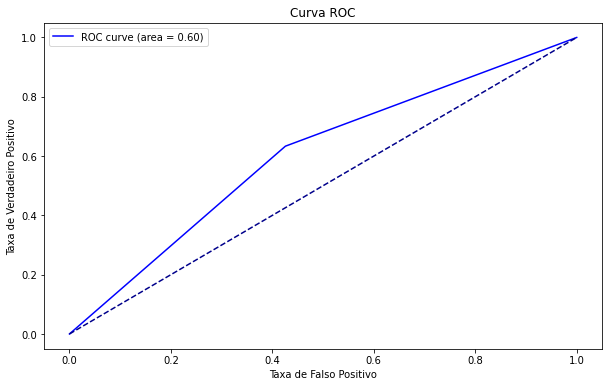

In [7]:
# indução do modelo

treeAprov3 = DecisionTreeClassifier(random_state=seed, class_weight='balanced')


# Hiperparâmetros a serem testados

parametros={'criterion':('gini','entropy'), 'min_samples_leaf':[1,2,3],'max_depth':[1,2,3,4,5,6,7,8,9,10,'None'] }

treeAprov3_grid=GridSearchCV(treeAprov3, param_grid=parametros)


# Fazendo a previsão

y_pred3 = treeAprov3_grid.fit(X_treino, y_treino).predict(X_teste)


# Encontrando os melhores hiperparâmetros

print('\n Melhores hiperparâmetros segundo o GridSearch: \n')
print(treeAprov3_grid.best_params_,'\n')


# Relatório

print(classification_report(y_teste, y_pred3))

cnf_matrix3 = confusion_matrix(y_teste, y_pred3)
cnf_table3 = pd.DataFrame(data=cnf_matrix3, index=["Aprovado=Não", "Aprovado=Sim"], 
                         columns=["Aprovado(prev)=Não", "Aprovado(prev)=Sim"])
print(cnf_table3)

print("\n Acurácia: \n", accuracy_score(y_teste, y_pred3))


# Curva ROC

print('\n Área abaixo da curva - AUC: %0.4f' % roc_auc_score(y_teste, y_pred3))

def plot_roc_curve(y_teste, y_pred3, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_teste, y_pred3)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_teste, y_pred3)
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()
    
plot_roc_curve(y_teste, y_pred3)    

#### 3.4) Gerando o melhor modelo

In [8]:
# Aplicando o modelo com os melhores hiperparâmetros

arvore = DecisionTreeClassifier(random_state=seed, criterion='entropy', class_weight='balanced', 
                                min_samples_leaf=2, max_depth=7)

arvore = arvore.fit(X_treino, y_treino)

In [9]:
# Criando tabela com os valores dos importances do modelo

## Extraindo os nomes dos atributos

nomes=pd.DataFrame(X0.keys())
nomes.rename(columns={0: 'Atributos'}, inplace = True)
nomes=nomes.reset_index()

## Valores das feature importances

importances=arvore.feature_importances_ 

betas = pd.DataFrame(data=importances)
betas.rename(columns={0: 'Feature Importance'}, inplace = True)

betas=betas.reset_index()

## Tabela

tabela_importances = pd.merge(nomes,betas, on = 'index')
del tabela_importances['index']
tabela_importances=tabela_importances.sort_values(by=['Feature Importance'], ascending=False)
tabela_importances['Ranking']=np.arange(k) # k é o número de atributos definido no item 2.1
tabela_importances['Ranking']=tabela_importances['Ranking']+1  # Fazendo o ranking começar do nº 1

tabela_importances.to_excel('tabelas/arvore_importances.xlsx',index=True,index_label='id') # salvando a tabela

print('Feature Importances: \n' )

tabela_importances

Feature Importances: 



Atributos  Feature Importance  \
42                                  idhm_A-Até 0,766            0.214713   
34                             faixa_etaria_A-Até 20            0.195156   
24                  serie_estudo_A-4ª série ou antes            0.131823   
28                           serie_estudo_E-8ª série            0.064521   
25                           serie_estudo_B-5ª série            0.060505   
14                      renda_propria_C-Mais de 1 SM            0.051798   
8            escolaridade_mae_A-Não estudou/não sabe            0.043882   
7   escolaridade_pai_D-Médio/Superior/especialização            0.030380   
46                               regiao_Centro-oeste            0.026197   
11  escolaridade_mae_D-Médio/Superior/especialização            0.018171   
29           idade_estudo_A-Não deixou de frequentar            0.017182   
16                            reprovou_A-Nenhuma vez            0.016057   
0                                    genero_Feminino            0.014529   
15                                    trabalha_A-Sim            0.013093   
3                        moradia_local_B-Zona urbana            0.009975   
2                             moradia_tipo_A-Própria            0.009292   
47                                   regiao_Nordeste            0.009046   
32                    idade_estudo_D-Mais de 18 anos            0.008282   
19                     reprovou_D-Três vezes ou mais            0.008216   
1                    moradia_pessoas_A-Até 3 pessoas            0.008057   
27                           serie_estudo_D-7ª série            0.006459   
13                          renda_propria_B-Até 1 SM            0.005229   
4            escolaridade_pai_A-Não estudou/não sabe            0.004147   
39            taxa_homicidios_B-Acima de 13,7 a 18,3            0.004067   
33                                         eja_A-Sim            0.003837   
31                 idade_estudo_C-Entre 15 e 18 anos            0.003821   
9                 escolaridade_mae_B-Antigo primário            0.003552   
30                   idade_estudo_B-Menos de 15 anos            0.003096   
21       motivo_estudo_B-Conseguir um emprego melhor            0.003037   
22             motivo_estudo_C-Adquirir conhecimento            0.002794   
40            taxa_homicidios_C-Acima de 18,3 a 25,9            0.001905   
48                                      regiao_Norte            0.001638   
18                             reprovou_C-Duas vezes            0.001395   
45                             idhm_D-Acima de 0,796            0.001230   
37                          faixa_etaria_D-42 e mais            0.000893   
26                           serie_estudo_C-6ª série            0.000880   
23                      motivo_estudo_D-Outro motivo            0.000657   
50                                        regiao_Sul            0.000488   
38                   taxa_homicidios_A-De 7,3 a 13,7            0.000000   
35                         faixa_etaria_B-De 21 a 30            0.000000   
12                     renda_propria_A-Nenhuma renda            0.000000   
41                   taxa_homicidios_D-Acima de 25,9            0.000000   
5                 escolaridade_pai_B-Antigo primário            0.000000   
43                     idhm_B-Acima de 0,766 a 0,787            0.000000   
44                     idhm_C-Acima de 0,787 a 0,796            0.000000   
6                  escolaridade_pai_C-Antigo ginásio            0.000000   
17                                reprovou_B-Uma vez            0.000000   
10                 escolaridade_mae_C-Antigo ginásio            0.000000   
20              motivo_estudo_A-Conseguir um emprego            0.000000   
49                                    regiao_Sudeste            0.000000   
36                         faixa_etaria_C-De 31 a 41            0.000000   

    Ranking  
42        1  
34        2  
24        3  
28        4  
25        5  
14    

### 4) Salvando o melhor modelo gerado

In [10]:
# Alterando o diretório dos dados

os.chdir("06-modelos")


# Salvando o modelo decision tree com os melhores hiperparâmetros

dump(arvore, 'modelo_decisiontree.joblib')


# Salvando a árvore

with open('saida_arvore.txt', 'w') as arquivo:
    r = export_text(arvore)
    print(r, file=arquivo)
